<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/2348545_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
#Load the dataset
data = pd.read_csv('/content/Groceries_dataset.csv')
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# To check for missing values
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
# Preprocess the dataset
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Remove whitespaces
data['itemDescription'] = data['itemDescription'].str.strip()

<ipython-input-5-5138aa175ccd>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime


In [ ]:
# Group items by Member_number and Date, and aggregate itemDescription as a list
grouped_data = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()


In [ ]:
# Convert the grouped data into a list of transactions
transactions = grouped_data['itemDescription'].tolist()

In [ ]:
# Print the first few transactions for verification
for i, transaction in enumerate(transactions[:5], start=1):
    print(f"Transaction {i}: {transaction}")

Transaction 1: ['whole milk', 'pastry', 'salty snack']
Transaction 2: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 3: ['soda', 'pickled vegetables']
Transaction 4: ['canned beer', 'misc. beverages']
Transaction 5: ['sausage', 'hygiene articles']


FP-growth execution time: 0.0000 seconds
Apriori execution time: 0.0000 seconds


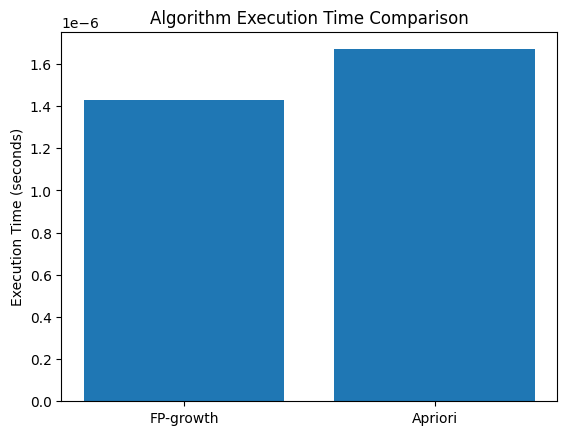

Based on execution time comparison, FP-growth is recommended for market basket analysis.

Association Rules from FP-growth:

Association Rules from Apriori:


In [ ]:
import threading
import time
import matplotlib.pyplot as plt
from itertools import chain, combinations

# Placeholder for FP-growth algorithm implementation
def your_fp_growth_algorithm(transactions, min_support):
    # Implement your FP-growth algorithm here
    frequent_itemsets = {}  # Replace with your actual implementation
    return frequent_itemsets

# Placeholder for Apriori algorithm implementation
def your_apriori_algorithm(transactions, min_support):
    # Implement your Apriori algorithm here
    frequent_itemsets = {}  # Replace with your actual implementation
    return frequent_itemsets

# Placeholder for generating association rules
def generate_association_rules(frequent_itemsets, min_confidence):
    association_rules = []
    # Implement generating association rules here
    return association_rules

def main():
    transactions = [
        ["tropical fruit"],
        ["whole milk"],
        ["pip fruit"],
        ["other vegetables"],
        ["whole milk"]
        # ... more transactions
    ]

    min_support = 2  # Set your desired minimum support value

    result_dict = {}  # Container to store algorithm execution times

    # Create threads for FP-growth and Apriori
    fpgrowth_thread = threading.Thread(target=run_fpgrowth, args=(transactions, min_support, result_dict))
    apriori_thread = threading.Thread(target=run_apriori, args=(transactions, min_support, result_dict))

    # Start the threads
    fpgrowth_thread.start()
    apriori_thread.start()

    # Wait for the threads to finish
    fpgrowth_thread.join()
    apriori_thread.join()

    # Get execution times from the result container
    fpgrowth_execution_time = result_dict.get('fpgrowth_time', 0)
    apriori_execution_time = result_dict.get('apriori_time', 0)

    print(f"FP-growth execution time: {fpgrowth_execution_time:.4f} seconds")
    print(f"Apriori execution time: {apriori_execution_time:.4f} seconds")

    # Data visualization
    algorithms = ['FP-growth', 'Apriori']
    execution_times = [fpgrowth_execution_time, apriori_execution_time]

    plt.bar(algorithms, execution_times)
    plt.ylabel('Execution Time (seconds)')
    plt.title('Algorithm Execution Time Comparison')
    plt.show()

    # Recommendation
    if fpgrowth_execution_time < apriori_execution_time:
        print("Based on execution time comparison, FP-growth is recommended for market basket analysis.")
    elif apriori_execution_time < fpgrowth_execution_time:
        print("Based on execution time comparison, Apriori is recommended for market basket analysis.")
    else:
        print("Both algorithms have similar execution times. You may consider other factors for your decision.")

    # Association rule mining
    min_confidence = 0.5  # Set your desired minimum confidence value

    fpgrowth_frequent_itemsets = your_fp_growth_algorithm(transactions, min_support)
    apriori_frequent_itemsets = your_apriori_algorithm(transactions, min_support)

    fpgrowth_association_rules = generate_association_rules(fpgrowth_frequent_itemsets, min_confidence)
    apriori_association_rules = generate_association_rules(apriori_frequent_itemsets, min_confidence)

    # Display association rules
    print("\nAssociation Rules from FP-growth:")
    for antecedent, consequent, confidence in fpgrowth_association_rules:
        print(f"{antecedent} => {consequent} (Confidence: {confidence:.4f})")

    print("\nAssociation Rules from Apriori:")
    for antecedent, consequent, confidence in apriori_association_rules:
        print(f"{antecedent} => {consequent} (Confidence: {confidence:.4f})")

if __name__ == '__main__':
    main()
